In [93]:
# import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
# location of the CSV file
womens_csv = "../Project1/Resources/2018_Womens_Shoes.csv"
#mens_csv = "../Project1/Resources/mens_shoe_prices.csv"
spring19_womens_csv = "../Project1/Resources/Spring19_women.csv"

In [3]:
# open the CSV and see a preview
shoes_df = pd.read_csv(womens_csv)
shoes_df.head()

,id,Date_Added,date_updated,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,...,prices.dateAdded,prices.dateSeen,prices.isSale,prices.size,Merchant,prices.sourceURLs,sizes,sourceURLs,upc,weight
0,AV_Ee528Hh53nbDR_0vY,11/16/17,2/11/18,2 lips too,"Womens,Shoes,Pumps,Heels,2 Lips Too",Shoes,https://media.kohlsimg.com/is/image/kohls/2552...,"2lipstootooellewomenshighheelsandals/84360578,...",NaN,NaN,...,2018-01-10T19:30:29Z,"2018-01-09T13:35:00.000Z,2018-01-05T13:09:00.0...",False,9.5 MED,kohls,https://www.kohls.com/product/prd-2552591/2-li...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8.5 MED,9 ...",https://www.kohls.com/product/prd-2552591/2-li...,"887063591443,887063591146,887063590842,8870635...",NaN
1,AV_Ee528Hh53nbDR_0vY,11/16/17,2/11/18,2 lips too,"Womens,Shoes,Pumps,Heels,2 Lips Too",Shoes,https://media.kohlsimg.com/is/image/kohls/2552...,"2lipstootooellewomenshighheelsandals/84360578,...",NaN,NaN,...,2017-11-17T15:54:13Z,2017-11-03T07:19:00.000Z,False,5.5 MED,kohls,https://www.kohls.com/product/prd-2552591/2-li...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8.5 MED,9 ...",https://www.kohls.com/product/prd-2552591/2-li...,"887063591443,887063591146,887063590842,8870635...",NaN
2,AV_Ee528Hh53nbDR_0vY,11/16/17,2/11/18,2 lips too,"Womens,Shoes,Pumps,Heels,2 Lips Too",Shoes,https://media.kohlsimg.com/is/image/kohls/2552...,"2lipstootooellewomenshighheelsandals/84360578,...",NaN,NaN,...,2017-11-17T15:54:13Z,2017-11-03T07:19:00.000Z,False,9 MED,kohls,https://www.kohls.com/product/prd-2552591/2-li...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8.5 MED,9 ...",https://www.kohls.com/product/prd-2552591/2-li...,"887063591443,887063591146,887063590842,8870635...",NaN
3,AV_Ee528Hh53nbDR_0vY,11/16/17,2/11/18,2 lips too,"Womens,Shoes,Pumps,Heels,2 Lips Too",Shoes,https://media.kohlsimg.com/is/image/kohls/2552...,"2lipstootooellewomenshighheelsandals/84360578,...",NaN,NaN,...,2017-11-17T15:54:13Z,2017-11-03T07:19:00.000Z,False,7.5 MED,kohls,https://www.kohls.com/product/prd-2552591/2-li...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8.5 MED,9 ...",https://www.kohls.com/product/prd-2552591/2-li...,"887063591443,887063591146,887063590842,8870635...",NaN
4,AV_Ee528Hh53nbDR_0vY,11/16/17,2/11/18,2 lips too,"Womens,Shoes,Pumps,Heels,2 Lips Too",Shoes,https://media.kohlsimg.com/is/image/kohls/2552...,"2lipstootooellewomenshighheelsandals/84360578,...",NaN,NaN,...,2018-02-11T05:04:36Z,"2018-01-16T16:06:00.000Z,2018-01-14T08:55:00.000Z",False,9 MED,kohls,https://www.kohls.com/product/prd-2552591/2-li...,"5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8.5 MED,9 ...",https://www.kohls.com/product/prd-2552591/2-li...,"887063591443,887063591146,887063590842,8870635...",NaN


In [4]:
#mens_shoes_df = pd.read_csv(mens_csv, error_bad_lines=False)
#mens_shoes_df.head()

In [5]:
spring19_df = pd.read_csv(spring19_womens_csv)
#spring19_df.head()

In [6]:
#spring19_df.info()

In [7]:
# info on the csv file (see where data is missing, data types)
#shoes_df.info()

In [8]:
#mens_shoes_df.info()

In [9]:
# drop unneeded columns here
shoes_df = shoes_df.drop(columns=["id",
                                  "prices.size",
                                  "weight",
                                  "prices.condition",
                                  "imageURLs",
                                  "manufacturerNumber",
                                  "upc",
                                  "sourceURLs",
                                  "prices.availability",
                                  "sizes",
                                  "keys",
                                  "manufacturer",
                                  "prices.dateAdded",
                                  "prices.dateSeen",
                                  "name",
                                  "Date_Added",
                                  "prices.isSale",
                                  "primaryCategories",
                                  "prices.sourceURLs",
                                  "categories",
                                  "prices.amountMin"
                         ])

In [10]:
# rename columns
shoes_df = shoes_df.rename(columns={#"prices.merchant": "Merchant",
                                    "brand": "Brand",
                                    "prices.color" : "Color",
                                    "Type_Name": "Type",
                                    "date_updated": "Date",
                                    "prices.currency": "Currency",
                                    "prices.amountMax": "Prices"
                                   })
shoes_df.head()

,Date,Brand,Type,Prices,Color,Currency,Merchant
0,2/11/18,2 lips too,Heels,64.95,Gold,USD,kohls
1,2/11/18,2 lips too,Heels,64.95,Pink,USD,kohls
2,2/11/18,2 lips too,Heels,64.95,Pink,USD,kohls
3,2/11/18,2 lips too,Heels,64.95,Gold,USD,kohls
4,2/11/18,2 lips too,Heels,64.95,White,USD,kohls


In [11]:
#shoes_df.info()

In [12]:
typebybrand_df = shoes_df.groupby("Brand")["Type"].unique()
typebybrand_df

Brand
2 lips too                                                         [Heels, Booties]
Altra                                                              [Athletic Shoes]
Arc'teryx                                                          [Athletic Shoes]
Asics                                                              [Athletic Shoes]
Astral                                                            [Flats, Sneakers]
Birkenstock                                                                 [Flats]
Bogs                                                                     [Sneakers]
Brinley Co.                                 [Boots, Heels, Booties, Flats, Sandals]
Brooks                                                             [Athletic Shoes]
Carrini                                                                     [Boots]
Chaco                                                              [Athletic Shoes]
Daniel Green                                                          

In [13]:
pricesbybrand_df = shoes_df.groupby("Brand")["Prices"].mean()
pricesbybrand_df

Brand
2 lips too                         67.320526
Altra                             129.950000
Arc'teryx                         170.000000
Asics                             119.950000
Astral                             89.925000
Birkenstock                       133.333333
Bogs                               64.990000
Brinley Co.                        53.353684
Brooks                            125.213158
Carrini                            34.950000
Chaco                             119.950000
Daniel Green                       35.000000
Danskin Now                        19.740000
Dansko                            130.000000
Dr. Scholl's                       76.961479
ELLIE SHOES                        37.410000
Earth Spirit                       19.820000
Easy Street                        54.990000
FOREVER YOUNG                      45.990000
Faded Glory                        14.587500
Fergalicious                       54.950000
Free People                       178.000000
Frye

In [14]:
typebycolor_df = shoes_df.groupby("Color")["Type"].unique()
typebycolor_df

Color
Black          [Heels, Booties, Sandals, Flats, Boots, Ballet...
Brown          [Heels, Sandals, Booties, Boots, Flats, Ballet...
Cream                                      [Flats, Ballet Flats]
Dark Blue      [Heels, Sandals, Flats, Ballet Flats, Sneakers...
Dark Green     [Booties, Sneakers, Heels, Ballet Flats, Flats...
Dark Red       [Ballet Flats, Sandals, Heels, Booties, Flats,...
Gold           [Heels, Ballet Flats, Sandals, Sneakers, Flats...
Gray           [Heels, Booties, Sandals, Flats, Boots, Sneake...
Light Blue     [Heels, Sandals, Athletic Shoes, Flats, Sneake...
Light Green              [Flats, Sandals, Heels, Athletic Shoes]
Orange                   [Flats, Sandals, Athletic Shoes, Heels]
Pink           [Heels, Sandals, Athletic Shoes, Ballet Flats,...
Print          [Heels, Flats, Sandals, Ballet Flats, Athletic...
Purple                  [Athletic Shoes, Sneakers, Heels, Flats]
Red            [Booties, Heels, Athletic Shoes, Flats, Sandal...
Tan            [Boo

In [15]:
avgpricesbytype_df = shoes_df.groupby("Type")["Prices"].mean()
avgpricesbytype_df

Type
Athletic Shoes    79.378627
Ballet Flats      60.734369
Booties           80.884943
Boots             88.556571
Flats             60.778856
Heels             63.413144
Sandals           60.475701
Sneakers          69.904569
Name: Prices, dtype: float64

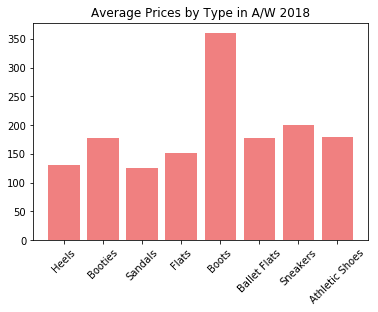

In [71]:
plt.bar(shoes_df["Type"], shoes_df["Prices"], label = "Average Prices by Type",
        color = "lightcoral")
plt.title("Average Prices by Type in A/W 2018")
plt.xticks(rotation=45)
plt.savefig('pricesbytype.png')
plt.show()

In [17]:
date_df = shoes_df["Date"].unique()
date_df

array(['2/11/18', '1/21/18', '2/1/18', '1/28/18', '2/14/18', '1/29/18',
       '1/9/18', '1/10/18', '1/2/18', '2/12/18', '1/19/18', '4/10/18',
       '4/7/18', '6/18/18', '1/25/18', '1/30/18', '7/3/18', '1/11/18',
       '6/25/18', '4/6/18', '6/28/18', '3/17/18', '3/12/18', '1/4/18',
       '1/3/18', '1/31/18', '2/13/18', '1/7/18', '6/27/18', '7/2/18',
       '1/22/18', '1/1/18', '1/20/18', '6/5/18', '1/5/18', '1/18/18',
       '3/11/18', '2/5/18', '7/4/18', '3/20/18', '2/7/18', '10/15/18',
       '1/23/18', '6/30/18', '5/21/18', '1/6/18', '6/22/18', '6/23/18',
       '4/21/18', '10/23/18', '2/28/18', '5/29/18'], dtype=object)

In [18]:
typecount_df = shoes_df.groupby("Type")["Date"].unique()
typecount_df

Type
Athletic Shoes    [1/19/18, 2/1/18, 4/10/18, 4/7/18, 6/18/18, 7/...
Ballet Flats      [2/1/18, 1/10/18, 1/22/18, 1/21/18, 4/10/18, 4...
Booties           [1/21/18, 2/1/18, 1/29/18, 1/4/18, 1/28/18, 1/...
Boots             [2/1/18, 3/17/18, 3/12/18, 1/28/18, 1/4/18, 1/...
Flats             [2/1/18, 1/2/18, 1/28/18, 1/10/18, 2/12/18, 4/...
Heels             [2/11/18, 2/1/18, 1/28/18, 2/14/18, 1/9/18, 1/...
Sandals           [1/29/18, 1/10/18, 2/1/18, 1/28/18, 1/5/18, 6/...
Sneakers          [2/1/18, 4/6/18, 1/10/18, 1/30/18, 1/20/18, 1/...
Name: Date, dtype: object

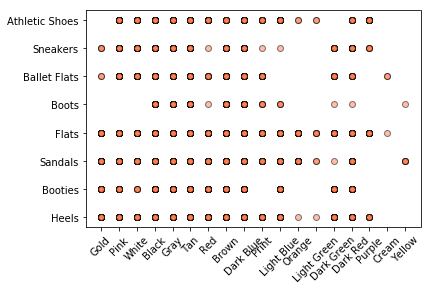

In [19]:
plt.scatter(shoes_df["Color"], shoes_df["Type"], label = "Shoes",
                    color = "coral", edgecolors = "black", alpha = 0.5) 
plt.xticks(rotation=45)
plt.show()

In [20]:
merchantname_df = shoes_df["Merchant"].unique()
merchantname_df

array(['kohls', 'backcountry', 'walmart', 'overstock', 'evo.com'],
      dtype=object)

In [21]:
pricesbymerchant_df = shoes_df.groupby("Merchant")["Prices"].sum()
pricesbymerchant_df

Merchant
backcountry     41880.34
evo.com          1979.60
kohls          645107.64
overstock         201.94
walmart          3065.92
Name: Prices, dtype: float64

In [22]:
totalmerchant_df = shoes_df.groupby("Merchant")["Date"].count()
totalmerchant_df

Merchant
backcountry     352
evo.com           8
kohls          9556
overstock         2
walmart          82
Name: Date, dtype: int64

In [56]:
merchantcount_df = shoes_df["Merchant"].value_counts()
merchantcount_df

merchants_df = shoes_df["Merchant"].unique()
merchants_df

array(['kohls', 'backcountry', 'walmart', 'overstock', 'evo.com'],
      dtype=object)

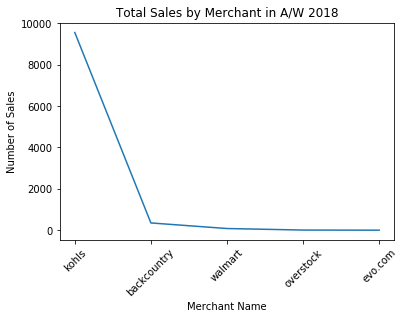

In [68]:
plt.plot(merchants_df, merchantcount_df, label = "Sales by Merchant")
plt.title("Total Sales by Merchant in A/W 2018")
plt.xticks(rotation=45)
plt.xlabel("Merchant Name")
plt.ylabel("Number of Sales")
plt.savefig('salesbymerchant.png')
plt.show()

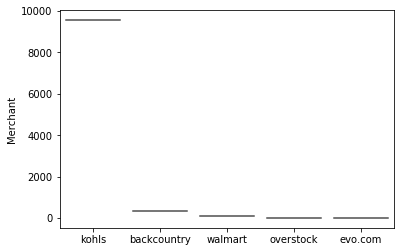

In [63]:
sns.violinplot(merchants_df, merchantcount_df, color="red", scale="count",)


In [45]:
shoecount_df = shoes_df["Type"].value_counts()
shoecount_df

shoetypes_df = shoes_df["Type"].unique()
shoetypes_df

array(['Heels', 'Booties', 'Sandals', 'Flats', 'Boots', 'Ballet Flats',
       'Sneakers', 'Athletic Shoes'], dtype=object)

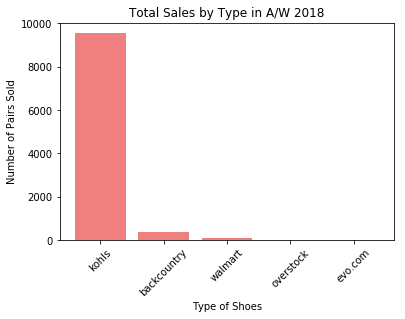

In [92]:
plt.bar(shoetypes_df, shoecount_df, label = "Total Sales by Type", color = "lightcoral")
plt.title("Total Sales by Type in A/W 2018")
plt.xticks(rotation=45)
plt.xlabel("Type of Shoes")
plt.ylabel("Number of Pairs Sold")
plt.savefig('salesbytype.png')
plt.show()

In [72]:
colorcount_df = shoes_df["Color"].value_counts()
colorcount_df

Black          2871
Gray           1775
Tan            1300
Dark Blue       997
Brown           919
White           545
Light Blue      302
Pink            297
Dark Red        224
Red             211
Dark Green      154
Gold            151
Print           127
Purple           64
Orange           46
Light Green       9
Yellow            5
Cream             3
Name: Color, dtype: int64

ValueError: shape mismatch: objects cannot be broadcast to a single shape

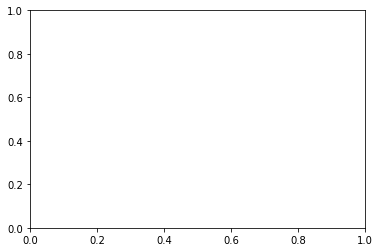

In [91]:
plt.bar(colorcount_df, shoecount_df, label = "Colors", color = "coral") 
plt.xticks(rotation=45)
plt.show()

In [ ]:
para_docs=(shoes_df.color.astype('str'))
oc_cloud= WordCloud(background_color='white',stopwords= STOPWORDS, max_words=100,max_font_size=50,random_state=1).generate(str(para_docs))
 #Generate the wordcloud output
plt.imshow(oc_cloud)
plt.axis('off')

In [94]:
spring19_df = spring19_df.drop(columns=["id",
                                  "dateAdded",
                                  "dateUpdated",
                                  "asins",
                                  "dimension",
                                  "ean / upc",
                                  "imageURLs",
                                  "keys",
                                  "manufacturerNumber",
                                  "prices.availability",
                                  "prices.condition",
                                  "prices.dateAdded",
                                  "prices.dateSeen",
                                  "prices.offer",
                                  "prices.returnPolicy",
                                        "sizes",
                                        "prices.shipping",
                                        "prices.merchant",
                                        "manufacturer",
                                  "prices.isSale",
                                  "primaryCategories",
                                  "prices.sourceURLs",
                                  "categories",
                                        "prices.amountMin",
                                        "prices.size",
                                        "prices.color",
                                        "sourceURLs"
                         ])
#spring19_df.head()

In [95]:
#spring19_df.info()

In [96]:
spring19_df = spring19_df.rename(columns={#"prices.merchant": "Merchant",
                                    "brand": "Brand",
                                    "colors" : "Color",
                                    "prices.currency": "Currency",
                                    "prices.amountMax": "Prices"
                                   })
spring19_df.head()

,Date,Brand,Color,Type,name,Prices,Currency,Merchant
0,5/1/19,City Classified,Black,Booties,City Classified Stylish-S Women's Zipper Ankle...,29.95,USD,Walmart
1,5/1/19,Skechers,Taupe,Athletic Shoes,"Skechers Women'S You Radiate, Walking",84.00,USD,Walmart
2,5/1/19,Floral,Black,Heels,FLORAL Pearl Women's Wide Width Evening Dress ...,49.95,USD,Walmart
3,5/1/19,Jambu,Black,Booties,Women's Jambu Amal Water Resistant Bootie,127.20,USD,Walmart
4,5/1/19,Trotters,White,Boots,"trotters women's blast iii boot,black quill,11...",47.66,USD,Walmart


In [106]:
typebybrand19_df = spring19_df.groupby("Brand")["Type"].value_counts()
typebybrand19_df

Brand               Type          
1.STATE             Sandals            2
911Costume          Boots              1
A2 by Aerosoles     Ballet Flats      33
                    Sandals            7
                    Flats              4
                    Booties            3
                    Heels              1
A35                 Boots              2
AARON               Boots              1
AERUSI              Flats              1
ARRAY               Sandals           10
                    Flats              8
                    Heels              2
                    Booties            1
AXNY                Boots              5
Academie Gear       Flats              1
Adidas              Flats             18
                    Heels              2
                    Sandals            2
                    Booties            1
Adriana             Booties            2
Aerosoft            Sandals            4
                    Athletic Shoes     1
Aerosoles           Bo

In [98]:
pricesbybrand19_df = spring19_df.groupby("Brand")["Prices"].mean()
pricesbybrand19_df

Brand
1.STATE                20.005000
911Costume             59.880000
A2 by Aerosoles        40.142708
A35                    72.795000
AARON                 229.980000
AERUSI                 25.000000
ARRAY                  45.470000
AXNY                   48.960000
Academie Gear          48.310000
Adidas                 61.459130
Adriana                33.950000
Aerosoft               30.308000
Aerosoles              94.265738
Ahnu                   67.314000
Aldo                   63.950000
Alegria               105.336667
Alfani                 46.821622
Alotta Knits            9.950000
American Rag           37.557500
Ann Creek              67.996000
Anne Michelle          30.000000
Annie                  26.867500
Answer 2              123.228750
Anthony Wang           29.000000
Apex                  144.950000
Aqua Design            19.950000
Aquapillar             39.200370
Aquatalia             149.990000
Aravon                 47.990000
Ariat                  13.330000
    

In [105]:
typebycolor19_df = spring19_df.groupby("Color")["Type"].value_counts()
typebycolor19_df

Color      Type          
Black      Flats             1276
           Boots             1246
           Sandals           1005
           Booties            798
           Heels              730
           Sneakers           116
           Athletic Shoes     111
           Ballet Flats        35
           Boat Shoes          11
Blue       Boots              828
           Flats              770
           Heels              727
           Booties            679
           Sandals            597
           Athletic Shoes     444
           Sneakers           297
           Ballet Flats       107
           Boat Shoes           7
Brown      Heels               73
           Sandals             23
           Booties             21
           Flats               11
           Boots                5
           Sneakers             1
Cream      Heels                3
           Boots                1
Dark Blue  Sneakers             2
           Boots                1
Gold       Sandals    

In [100]:
avgpricesbytype19_df = spring19_df.groupby("Type")["Prices"].mean()
avgpricesbytype19_df

Type
Athletic Shoes    104.423435
Ballet Flats       39.226250
Boat Shoes         90.793333
Booties            73.281350
Boots              78.227232
Flats              73.227358
Heels              59.701068
Sandals            64.084960
Sneakers           79.166086
Name: Prices, dtype: float64

In [101]:
typecount19_df = spring19_df.groupby("Type")["Date"].count()
typecount19_df

Type
Athletic Shoes     556
Ballet Flats       144
Boat Shoes          18
Booties           1511
Boots             2088
Flats             2074
Heels             1545
Sandals           1643
Sneakers           419
Name: Date, dtype: int64

In [102]:
merchantname19_df = spring19_df["Merchant"].unique()
merchantname19_df

array(['Walmart', 'Shoes.com', 'Barcodable', 'Overstock'], dtype=object)

In [103]:
pricesbymerchant19_df = spring19_df.groupby("Merchant")["Prices"].sum()
pricesbymerchant19_df

Merchant
Barcodable       149.22
Overstock         95.99
Shoes.com       1127.64
Walmart       720609.89
Name: Prices, dtype: float64

In [104]:
totalmerchant19_df = spring19_df.groupby("Merchant")["Date"].count()
totalmerchant19_df

Merchant
Barcodable       3
Overstock        1
Shoes.com       32
Walmart       9962
Name: Date, dtype: int64

In [ ]:
#mens_shoes_df = mens_shoes_df.drop(columns=["id",
#                                            "asins",
#                                            "count",
#                                            "imageURLs",
#                                            "descriptions",
#                                            "dimension",
#                                            "ean",
#                                            "features",
#                                            "flavors",
#                                            "isbn",
#                                            "keys",
#                                            "manufacturer",
#                                            "manufacturerNumber",
#                                            "prices.availability",
#                                            "prices.condition",
#                                            "prices.count",
#                                            "prices.dateAdded",
#                                            "prices.dateSeen",
#                                            "prices.flavor",
#                                            "prices.offer",
#                                            "prices.returnPolicy",
#                                            "prices.shipping",
#                                            "prices.size",
#                                            "prices.source",
#                                            "prices.warranty",
#                                            "quantities",
#                                            "reviews",
#                                            "sizes",
#                                            "skus",
#                                            "sourceURLs",
#                                            "upc",
#                                            "vin",
#                                            "websiteIDs",
#                                            "weight",
#                                            "prices.color",
#                                            "dateAdded",
#                                            "dateUpdated",
#                                            "Unnamed: 50"
#                                           ])

In [ ]:
#mens_shoes_df = mens_shoes_df[pd.notnull(mens_shoes_df['colors'])]
#mens_shoes_df.head()

In [ ]:
#mens_shoes_df.info()